# Xopt basic example

An Xopt problem can be described by a simple YAML file. Here we will demonstrate how this is used to optimize a well-known constrained multi-objective test function, TNK.

## TNK test function

The TNK function is defined with:

$n=2$ variables:
$x_i \in [0, \pi], i=1,2$

Objectives:
- $f_i(x) = x_i$

Constraints:
- $g_1(x) = -x_1^2 -x_2^2 + 1 + 0.1 \cos\left(16 \arctan \frac{x_1}{x_2}\right) \le 0$
- $g_2(x) = (x_1 - 1/2)^2 + (x_2-1/2)^2 \le 0.5$

In [1]:
# Import the class
from xopt import Xopt

In [2]:
!mkdir -p temp

The `Xopt` object can be instantiated from a JSON or YAML file, or a dict, with the proper structure.

Here we will make one

In [3]:
# Make a proper input file.
YAML = """
xopt: {}
generator:
    name: random

evaluator:
    function: xopt.resources.test_functions.tnk.evaluate_TNK
    function_kwargs:
        a: 999

vocs:
    variables:
        x1: [0, 3.14159]
        x2: [0, 3.14159]
    objectives: {y1: MINIMIZE, y2: MINIMIZE}
    constraints:
        c1: [GREATER_THAN, 0]
        c2: [LESS_THAN, 0.5]
    linked_variables: {x9: x1}
    constants: {a: dummy_constant}

"""

In [4]:
import yaml
yaml.safe_load(YAML)['evaluator']

{'function': 'xopt.resources.test_functions.tnk.evaluate_TNK',
 'function_kwargs': {'a': 999}}

In [5]:
from xopt import Evaluator
Evaluator(**yaml.safe_load(YAML)['evaluator'])

Evaluator(function=<function evaluate_TNK at 0x15c263940>, max_workers=1, executor=NormalExecutor[DummyExecutor](loader=ObjLoader[DummyExecutor](object=None, loader=CallableModel(callable=<class 'xopt.evaluator.DummyExecutor'>, kwargs=Kwargs_DummyExecutor()), object_type=<class 'xopt.evaluator.DummyExecutor'>), executor_type=<class 'xopt.evaluator.DummyExecutor'>, submit_callable='submit', map_callable='map', shutdown_callable='shutdown', executor=<xopt.evaluator.DummyExecutor object at 0x15c255e80>), function_kwargs={'extra_option': 'abc', 'sleep': 0, 'random_sleep': 0, 'raise_probability': 0, 'a': 999})

In [6]:
# create Xopt object.
X = Xopt(YAML)

In [7]:
# Convenient representation of the state.
X


            Xopt 
________________________________           
Version: 0.5.0+179.g1221dc6.dirty
Data size: 0
Config as YAML:
xopt: {asynch: false, strict: false, dump_file: null, max_evaluations: null}
generator: {name: random}
evaluator:
  function: xopt.resources.test_functions.tnk.evaluate_TNK
  max_workers: 1
  function_kwargs: {extra_option: abc, sleep: 0, random_sleep: 0, raise_probability: 0,
    a: 999}
vocs:
  variables:
    x1: [0.0, 3.14159]
    x2: [0.0, 3.14159]
  constraints:
    c1: [GREATER_THAN, 0.0]
    c2: [LESS_THAN, 0.5]
  objectives: {y1: MINIMIZE, y2: MINIMIZE}
  constants: {a: dummy_constant}
  linked_variables: {x9: x1}


In [8]:
X.random_evaluate(10)

{'y1': array([2.08631425, 0.30770408, 0.90718176, 2.35540159, 2.1106882 ,
        2.44472929, 2.31641349, 1.1998647 , 1.04123516, 3.00685421]),
 'y2': array([0.02793796, 2.5687168 , 1.09368821, 2.74595518, 1.73159173,
        1.8494381 , 0.80453578, 0.23858143, 1.13141933, 0.98809195]),
 'c1': array([ 3.25577392,  5.7260289 ,  1.01077335, 12.05406206,  6.45368881,
         8.45629552,  4.95363735,  0.59659634,  1.28551217,  8.98156457]),
 'c2': array([2.73923546, 4.31656694, 0.51826267, 8.48682977, 4.11113466,
        5.6029552 , 3.39209999, 0.55815027, 0.69162587, 6.52255178]),
 'some_array': array([1, 2, 3])}

# Run Random data generation

In [9]:
import numpy as np
np.random.seed(10)

In [10]:
# Take one step (generate a single point)
X.step()

In [11]:
# examine the results
X.data

,x1,x2,a,x9,y1,y2,c1,c2,some_array,xopt_error,xopt_error_str
1,0.718417,3.076396,dummy_constant,0.718417,0.718417,3.076396,9.066664,6.685522,"[1, 2, 3]",False,


In [12]:
# take a couple of steps and examine the results
for _ in range(10):
    X.step()
X.data

,x1,x2,a,x9,y1,y2,c1,c2,some_array,xopt_error,xopt_error_str
1,0.718417,3.076396,dummy_constant,0.718417,0.718417,3.076396,9.066664,6.685522,"[1, 2, 3]",False,
2,1.150927,0.789155,dummy_constant,1.150927,1.150927,0.789155,1.045563,0.507317,"[1, 2, 3]",False,
3,1.575485,2.435371,dummy_constant,1.575485,1.575485,2.435371,7.510380,4.902330,"[1, 2, 3]",False,
4,2.519358,0.752314,dummy_constant,2.519358,2.519358,0.752314,5.920078,4.141468,"[1, 2, 3]",False,
5,2.610313,2.864063,dummy_constant,2.610313,2.610313,2.864063,13.942816,10.042213,"[1, 2, 3]",False,
6,0.988470,0.146419,dummy_constant,0.988470,0.988470,0.146419,0.068991,0.363623,"[1, 2, 3]",False,
7,3.129186,1.532492,dummy_constant,3.129186,3.129186,1.532492,11.086588,7.978659,"[1, 2, 3]",False,
8,0.588668,1.217284,dummy_constant,0.588668,0.588668,1.217284,0.768029,0.522359,"[1, 2, 3]",False,
9,0.874131,2.224635,dummy_constant,0.874131,0.874131,2.224635,4.617362,3.114340,"[1, 2, 3]",False,
10,0.258320,0.896686,dummy_constant,0.258320,0.258320,0.896686,-0.106956,0.215769,"[1, 2, 3]",False,


# Plotting
Plot the objective results

<AxesSubplot:xlabel='y1', ylabel='y2'>

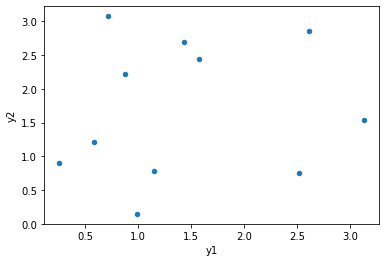

In [13]:
import matplotlib.pyplot as plt

X.data.plot(*X.vocs.objective_names, kind="scatter")

In [14]:
# Cleanup
!rm -r temp

# Alternative initialiation methods

For convenience, if the first (and only) positional argument is present, then Xopt will automatically try to load from JSON, YAML str or files, or as a dict.

In [15]:
import yaml
import json

config  = yaml.safe_load(YAML) 
# All these methods work

X = Xopt(YAML)
X = Xopt(config)
X = Xopt(json.dumps(config, indent=4))


# Convenience Methods

In [16]:
# Call the evaluator's function directly.
X.evaluate({'x1': .5, 'x2': 0.5})

{'y1': 0.5, 'y2': 0.5, 'c1': -0.6, 'c2': 0.0, 'some_array': array([1, 2, 3])}

In [17]:
# Create random inputs according to the vocs
X.random_inputs()

{'x1': 1.9687064016299047,
 'x2': 1.0237385762437203,
 'a': 'dummy_constant',
 'x9': 1.9687064016299047}

In [18]:
# These can be combined:
np.random.seed(10)
X.evaluate(X.random_inputs())

{'y1': 0.7184167803196234,
 'y2': 3.0763958834119975,
 'c1': 9.066663826202975,
 'c2': 6.6855216379874784,
 'some_array': array([1, 2, 3])}

In [19]:
# And this is a convenience method for above
np.random.seed(10)
X.random_evaluate()

{'y1': 0.7184167803196234,
 'y2': 3.0763958834119975,
 'c1': 9.066663826202975,
 'c2': 6.6855216379874784,
 'some_array': array([1, 2, 3])}

# Logging

Normally Xopt will not issue print statments, and instead issue logging messages. Below will enable these to be seen in the notebook

In [20]:
# Notebook printing output
from xopt import output_notebook
output_notebook()

In [21]:
X.step()

Running Xopt step
